# Lattice

In [72]:
from manim import Scene, config, Axes # General Stuff

from manim import Dot, Arrow, MathTex # Objects
from manim import WHITE, BLACK, GRAY, GREEN, RED # Colors
from manim import RIGHT, LEFT, DOWN, UP
config["background_color"] = WHITE
import numpy as np

basis = np.asarray([
    [1,1.5],
    [1, 0]
])

points = []
for i in range(-10, 10, 1):
    for j in range(-10, 10, 1):
        points.append(np.asarray([i, j]))

lattice_points = [basis @ p for p in points]

class LatticeGrid(Scene):

    def construct(self):
        ax = Axes(x_range=[-7, 7, 1],
                  y_range=[-7, 7, 1],
                  x_length=15,
                  y_length=15,
                  axis_config={
                      "stroke_color": GRAY,
                      "tick_size": 0
                  },
                  tips=False)

        dots = [
            Dot(ax.coords_to_point(p[0], p[1]), color=BLACK, radius=0.08)
            for p in lattice_points
        ]

        b1 = Arrow(ax.coords_to_point(0, 0),
                   ax.coords_to_point(*basis @ np.asarray([1, 0])),
                   color=GREEN,
                   buff=0)
        b1_text = MathTex(r"b_1", color=GREEN).next_to(b1, UP)
        b2 = Arrow(ax.coords_to_point(0, 0),
                   ax.coords_to_point(*basis @ np.asarray([0, 1])),
                   color=RED,
                   buff=0)
        b2_text = MathTex(r"b_2", color=RED).next_to(b2, RIGHT)

        self.add(ax, *dots, b1, b2, b1_text, b2_text)




In [30]:
%manim -qm -v WARNING -r 1000,1000 LatticeGrid

ManimColor('#000000')

# Output Size

In [1]:
from itertools import product
from math import ceil

import pandas as pd
import seaborn as sns

In [2]:
def sk(n: int, d: int, **kwargs) -> int:
    return n * d

def pk(n: int, d: int, **kwargs) -> int:
    return (n*n+n) * d

def rlk(n: int, d: int, **kwargs) -> int:
    return n*((n*n+n) * d)

def m(n: int, d: int, l:int, **kwargs) -> int:
    return ceil(l/d) * d

def ct(n: int, d: int, l:int, **kwargs) -> int:
    return ceil(l/d) * ((n+1) * d)


In [3]:
plwe = "Plain-LWE"
rlwe = "Ring-LWE"
mlwe = "Module-LWE"
schemes = [plwe, rlwe, mlwe]
functions = [sk, pk ,rlk, m, ct]
data = []

for function, scheme in product(functions, schemes):
    d_range = [1] if scheme == plwe else [2**i for i in range(9)]
    n_range = [1] if scheme == rlwe else [2**i for i in range(9)]
    for n in n_range:
        for d in d_range:
            data.append({
                "scheme": scheme,
                "function": function.__name__,
                "n": n,
                "d": d,
                "l": 64,
                "bit": function(n=n, d=d, l=64)
            })
df = pd.DataFrame(data)

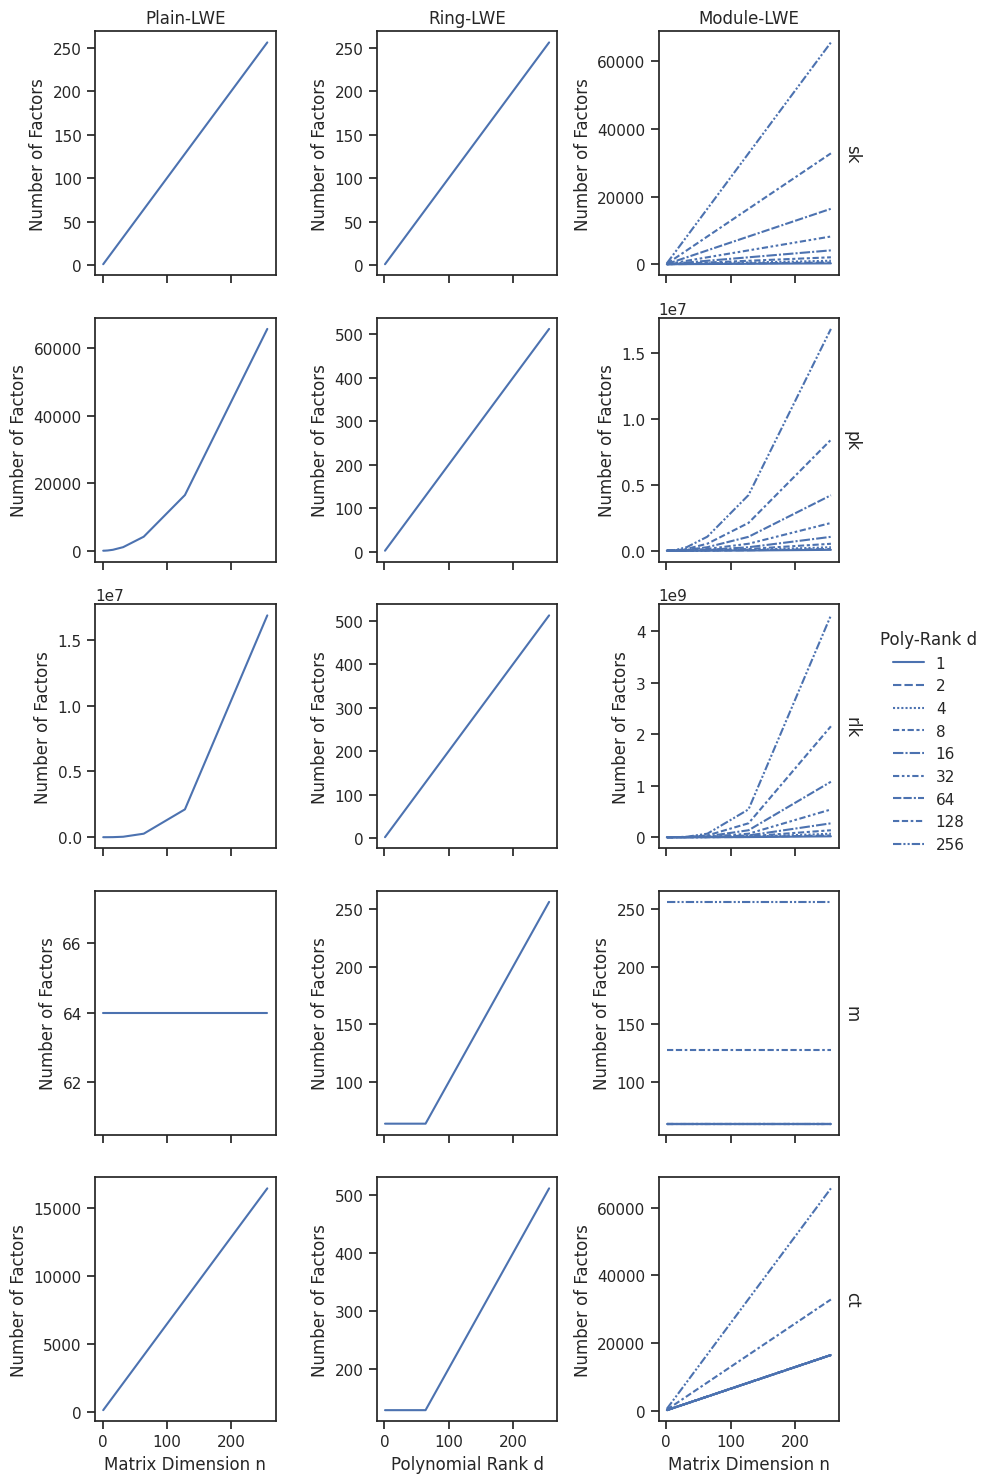

In [9]:
from matplotlib.text import Text


sns.set_theme(style="ticks")

grid = sns.FacetGrid(df, col="scheme", row="function",
                     margin_titles=True, despine=False, sharey=False, legend_out=True, sharex="col")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_ylabels("number of factors")


def plot(data: pd.DataFrame, color, **kwargs):
    # print(kwargs)
    if data["scheme"].unique()[0] == rlwe:
        p = sns.lineplot(data, x="d", y="bit",
                         color=color)
        p.set_xlabel("Polynomial Rank d")
    elif data["scheme"].unique()[0] == plwe:
        p = sns.lineplot(data, x="n", y="bit", color=color)
        p.set_xlabel(
            "Matrix Dimension n")
    else:
        p = sns.lineplot(data, x="n", y="bit", style="d", color=color,
                         legend="full")
        p.set_xlabel("Matrix Dimension n")
    p.set_ylabel("Number of Factors")


grid.map_dataframe(plot)
grid.add_legend(title='Poly-Rank d')